In [44]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [45]:
using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie, GLMakie

In [46]:
function model_braint_rhythms(u, p, t)

    sE, sI, rE, rI, Y = u
    τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, gammaY, ythr, sEthr, kY = p

    g(Y) = 1 + gammaY / (1 + exp(-Y + ythr))
    HevY(sE) = 1/(1 + exp(-(sE - sEthr)/kY))

    dsEdt = (1/τsE) *(-sE + γE*rE*(1-sE)*g(Y) + s0E)
    dsIdt = (1/τsI) *(-sI + γI*rI*(1-sI) + s0I)

    drEdt = (1/ τrE) *(-rE + 1/(1 + exp(-kE*((IE + wEE*sE-wIE*sI) -  θE))))
    drIdt = (1/τrI) *(-rI + 1/(1 + exp(-kI*((II + wEI*sE-wII*sI) - θI))))
    
    dYdt = -Y / τY + βY * HevY(sE)
    
    return SVector(dsEdt, dsIdt, drEdt, drIdt, dYdt)
end

τsE = 3.0; γE = 4.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;

τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.0; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 0.01;  βY = 0.01;
ythr = 0.5; sEthr = 0.5; kY = 0.01

0.01

In [47]:
time = 500.0; tt = 250.0; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [95]:
γY = 10.0
p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.0, 0.0, 0.0, 0.0, 0.0]

ds = CoupledODEs(model_braint_rhythms, u0, p, diffeq = integ_set)
#tr, trange = trajectory(ds, time, Δt = tstep)
tr, trange = trajectory(ds, time, Δt = tstep; Ttr = tt)

(5-dimensional StateSpaceSet{Float64} with 500001 points, 250.0:0.001:750.0)

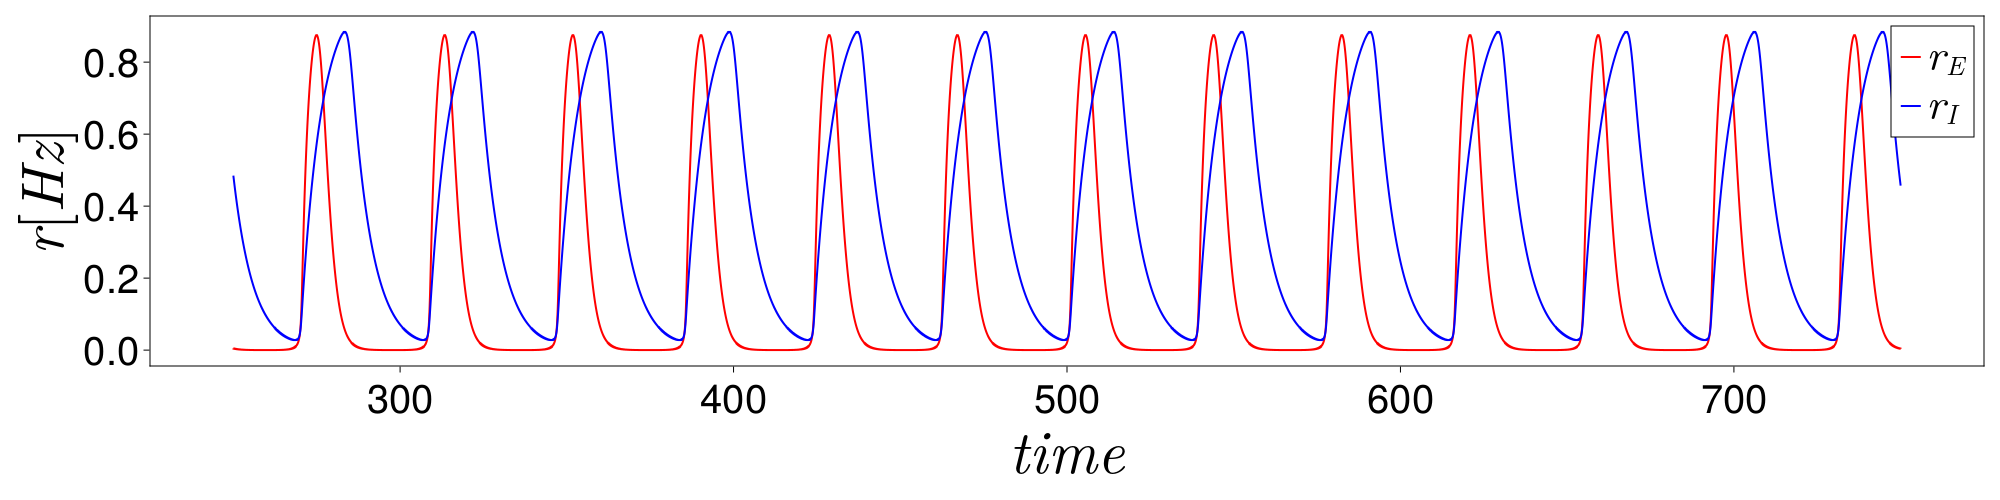

CairoMakie.Screen{EPS}


In [96]:
tstart, tend = 1, length(tr)
tickssize = 40
labelsize = 60
lw = 2.0

CairoMakie.activate!()
f= Figure(resolution = (2000, 500))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r[Hz]", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = tickssize, yticklabelsize = tickssize, xgridvisible = false, ygridvisible = false)

lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 3], linewidth = lw, color = :red, label = L"r_E")
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 4], linewidth = lw, color = :blue, label = L"r_I")
axislegend(axisrHz, labelsize = 45)
display(f)
save("timeseries_gammaY_10.0.eps", f)

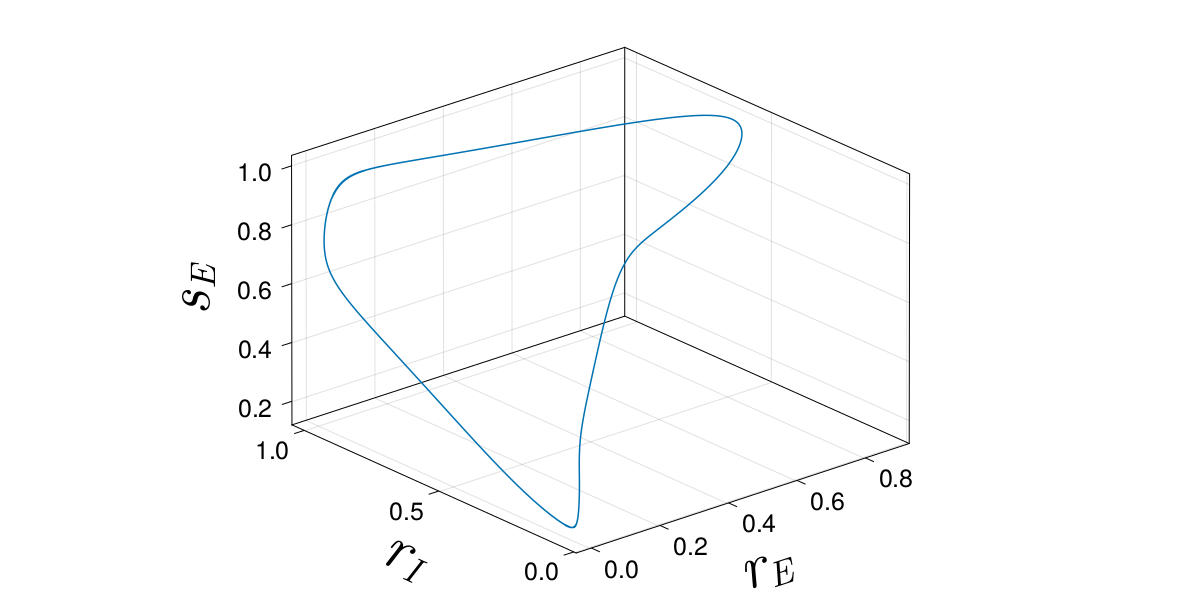

CairoMakie.Screen{IMAGE}


In [88]:
tstart, tend = 1, 100000;
ix, iy, iz = 3, 4, 1;
xl = L"r_{E}"; yl = L"r_{I}"; zl = L"s_{E}";
lbsize = 60; ticksize = 25;
f= Figure(resolution = (1200, 600))
ax3 = Axis3(f[1, 1], xlabel = xl, ylabel = yl, zlabel = zl, 
xlabelsize = lbsize, ylabelsize = lbsize, zlabelsize = lbsize,
xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
zlabeloffset = 70)
lines!(ax3, tr[tstart:tend, ix], tr[tstart:tend, iy], tr[tstart:tend, iz] )
display(f)